1. Загрузить файл, разделить его на train и test. Для test взять 10% случайно выбранных строк таблицы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_prepared.csv')

df = df.fillna(df.median())
df = df.drop('Unnamed: 0',axis=1)

df["age_child"] = df["age_child"].astype(int)
df["age_adult"] = df["age_adult"].astype(int)
df["age_old"] = df["age_old"].astype(int)
df["morning"] = df["morning"].astype(int)
df["day"] = df["day"].astype(int)
df["evening"] = df["evening"].astype(int)

df.head()

,sex,row_number,liters_drunk,drink,check_number,label,age_child,age_adult,age_old,morning,day,evening
0,0,90.0,1.0,1,8092,1,0,0,1,0,0,1
1,0,81.0,4.0,1,4252,1,0,1,0,0,1,0
2,1,14.0,3.0,0,6913,1,0,0,1,0,0,1
3,1,0.0,1.0,0,8479,1,0,0,1,0,1,0
4,1,84.0,1.0,0,6279,0,0,0,1,1,0,0


In [3]:
from sklearn.model_selection import train_test_split

y = df.label
x = df.drop('label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

2. Обучить модели: Decision Tree, XGBoost, Logistic Regression из библиотек sklearn и xgboost. Обучить модели предсказывать столбец label по остальным столбцам таблицы.

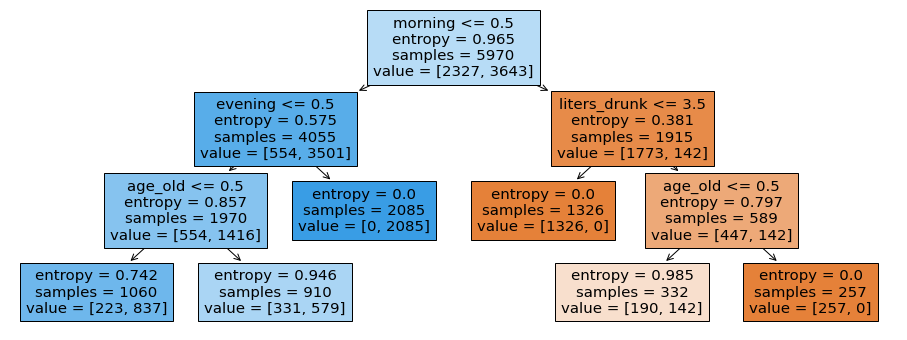

In [4]:
# обучение методом Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DTmodel = DecisionTreeClassifier(max_depth=3, criterion='entropy')
DTmodel.fit(x_train, y_train)

plt.figure(figsize=(16, 6))
tree.plot_tree(DTmodel, feature_names=x_train.columns, filled=True)
plt.show()

In [65]:
# обучение методом XGBoost

from xgboost import XGBClassifier

XGBmodel = XGBClassifier(n_estimators=20, max_depth=4)
XGBmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
# обучение методом Logistic Regression

# вначале масштабируем
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x_train)
scaled_x_tst = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=0.1, solver='lbfgs')
LRmodel.fit(scaled_x, y_train)

LogisticRegression(C=0.1)

3. Наладить замер Accuracy - доли верно угаданных ответов.
4. Точности всех моделей не должны быть ниже 85%.

In [67]:
print("Accuracy of Decision Tree: ", DTmodel.score(x_test,y_test))
print("Accuracy of XGBoost: ", XGBmodel.score(x_test,y_test))
print("Accuracy of Logistic Regression: ", LRmodel.score(scaled_x_tst,y_test))

Accuracy of Decision Tree:  0.8704819277108434
Accuracy of XGBoost:  0.8975903614457831
Accuracy of Logistic Regression:  0.8780120481927711


5. С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них

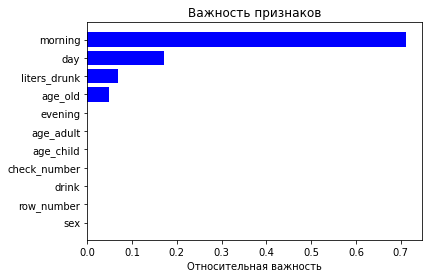

In [68]:
importances = DTmodel.feature_importances_
features = x_train.columns
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [69]:
# проверяем точность на 2 признаках
x_train2 = x_train[['morning','day']]
x_test2 = x_test[['morning','day']]
DT2model = model.fit(x_train2, y_train)
print("Accuracy of Decision Tree with 2 param.: ", DT2model.score(x_test2,y_test))

Accuracy of Decision Tree with 2 param.:  0.8704819277108434
